## Importing and viewing the Train Data

In [75]:

import numpy as np
import pandas as pd


df = pd.read_csv("/kaggle/input/cancellation/train.csv", encoding="utf-8")

print(df.info())
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70711 entries, 0 to 70710
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    70711 non-null  int64  
 1   TimeOfCreation        70711 non-null  object 
 2   TimeOfDeparture       70711 non-null  object 
 3   BillNo.               70711 non-null  int64  
 4   TicketNo.             70711 non-null  float64
 5   StatusofReserve       70711 non-null  int64  
 6   UserID                29680 non-null  float64
 7   Gender-Male           70711 non-null  bool   
 8   Price                 70711 non-null  float64
 9   Discounts             70711 non-null  float64
 10  CityFrom              70711 non-null  object 
 11  CityTo                70711 non-null  object 
 12  DomesticFlight        70711 non-null  int64  
 13  TypeOfVehicle         65422 non-null  object 
 14  VehicleClass          43826 non-null  object 
 15  ReasonForTrip      

,ID,TimeOfCreation,TimeOfDeparture,BillNo.,TicketNo.,StatusofReserve,UserID,Gender-Male,Price,Discounts,...,DomesticFlight,TypeOfVehicle,VehicleClass,ReasonForTrip,ModeOfTravel,PassportNumberHashed,EmailHashed,BuyerMobile,NationalCode,Cancelled
0,100505,2022-07-06 06:02:12.407,2022-07-06 10:30:00,38131030,7359427.0,3,NaN,True,850000.0,0.0,...,1,اسکانیا کلاسیک ۳۲نفره,True,Int,Bus,NaN,51726016301ff645e88be828ae6277a23ea22fcab14880...,965396967731,103017017,0
1,100506,2022-09-11 13:51:08.797,2022-09-13 14:45:00,39115817,3002688.0,2,891421.0,True,5338000.0,0.0,...,1,5ستاره اكونومي سلامت فدك,NaN,Int,Train,NaN,e5a486781dac75d915322638102f2bafd512687be5d814...,452719996887,261570051,0
2,100507,2022-08-01 14:45:28.883,2022-08-24 20:39:00,38510118,2927990.0,4,NaN,False,1355000.0,0.0,...,1,3 ستاره 6 تخته کوير,NaN,Work,Train,NaN,NaN,116690640411,957707173,1
3,100508,2022-09-29 10:41:28.120,2022-09-29 20:30:00,39403118,7663791.0,3,264716.0,True,2540000.0,0.0,...,1,VIP 2+1 / یک وعده غذای گرم,True,Work,Bus,NaN,b565e2250ec788a19435ec680fd11c47f77f0c92587bf4...,642337257287,264441760,0
4,100509,2022-10-03 16:43:35.277,2022-10-04 12:15:00,39470084,7681449.0,3,76842.0,True,1690000.0,0.0,...,1,VIPمارال تخت شو با شارژر اختصاصی,True,Int,Bus,NaN,aa472b493e4499370b308a11358755bef6c4b04def69f2...,138128253547,765571492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,171211,2022-04-07 20:00:01.463,2022-04-08 23:00:00,36839872,7018030.0,5,NaN,True,1250000.0,0.0,...,1,VIP تخت شو با تغذیه و شارژر اختصاصی,True,Work,Bus,NaN,NaN,331267793363,786340025,1
70707,171212,2022-06-09 07:48:10.583,2022-06-09 16:50:00,37704940,2825554.0,2,NaN,True,3490000.0,0.0,...,1,4ستاره 4تخته غزال,NaN,Work,Train,NaN,5f8a8f968e1acf15fd5c1bc6972c43af532825df83bbce...,409302394890,223381594,0
70708,171213,2022-08-13 07:19:38.040,2022-08-14 23:15:00,38660767,7510813.0,3,NaN,True,1725000.0,0.0,...,1,VIPمانیتوردار,True,Work,Bus,NaN,a3a16f687108ba4854855f3788efc31c8b368fbfb68994...,666188659988,1940457,0
70709,171214,2022-05-02 12:38:36.460,2022-05-03 19:00:00,37152781,7096569.0,3,NaN,False,3200000.0,0.0,...,1,VIPمانیتوردار,True,Int,Bus,NaN,NaN,832973699414,194725973,0


### Checking for NULLS



In [63]:
# Calculate the percentage of null values in each column
null_percentages = (df.isna().sum()/df.shape[0])*100

# Filter the columns with null values
columns_with_nulls = null_percentages[null_percentages > 0]

# Print the columns with null values
columns_with_nulls


UserID                  58.026333
TypeOfVehicle            7.479741
VehicleClass            38.020959
PassportNumberHashed    99.130263
EmailHashed             57.446508
dtype: float64

We can drop columns in which nulls values are more than 30%, and rows corresponding to the null values in columns
 where null values are less than 5%

### Visualizing correlation between featuers via Heat-Map

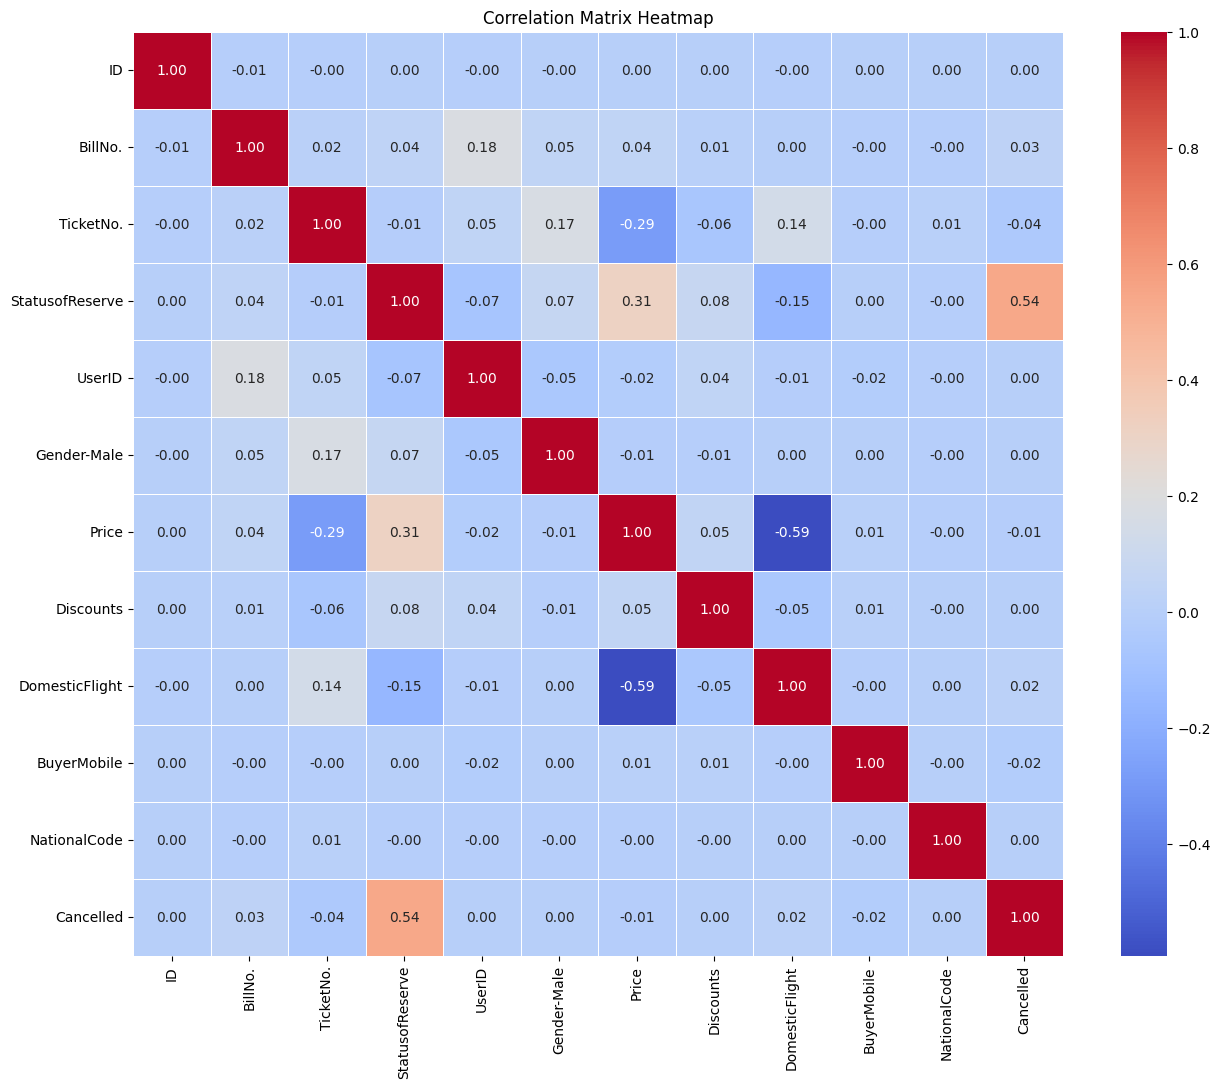

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix Heatmap")
plt.show()


### Dropping features that aren't much correlated

In [65]:
columns_to_drop = ['ID', "CityTo", "CityFrom", "VehicleClass", "PassportNumberHashed", "EmailHashed", "UserID", "TypeOfVehicle", "Discounts", "NationalCode", "Gender-Male", "Price"]
df.drop(columns_to_drop, axis=1, inplace=True)


### Checking for Duplicates and dropping them

In [66]:
# Count the number of duplicate rows
num_duplicate_rows = df.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of Duplicate Rows: {num_duplicate_rows}")

df.drop_duplicates(inplace=True)

# Verify that duplicate rows are dropped
print(f"Number of Duplicate Rows after Dropping: {df.duplicated().sum()}")
df.columns

Number of Duplicate Rows: 1
Number of Duplicate Rows after Dropping: 0


Index(['TimeOfCreation', 'TimeOfDeparture', 'BillNo.', 'TicketNo.',
       'StatusofReserve', 'DomesticFlight', 'ReasonForTrip', 'ModeOfTravel',
       'BuyerMobile', 'Cancelled'],
      dtype='object')

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


object_columns = df.select_dtypes(include=['object']).columns
# Exclude 'TimeOfCreation' and 'TimeOfDeparture'
object_columns = [col for col in object_columns if col not in ['TimeOfCreation', 'TimeOfDeparture']]

unique_value_counts = df[object_columns].nunique().sort_values(ascending=False)
plt.figure(figsize=(6, 10))  
sns.barplot(x=unique_value_counts.values, y=unique_value_counts.index, palette="viridis", orient="h")
plt.title("Unique Values in Object Columns (Excluding Time)")
plt.xlabel("Number of Unique Values")
plt.ylabel("Columns")

plt.savefig("unique_values_plot.png", bbox_inches="tight")
plt.show()

TimeOfCreation     54448
TimeOfDeparture    26891
BillNo.            54448
TicketNo.          70668
StatusofReserve        4
DomesticFlight         2
ReasonForTrip          2
ModeOfTravel           4
BuyerMobile        35773
Cancelled              2
dtype: int64


### Label Encoding categorical data



In [68]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate over the columns you want to label encode
columns_to_encode = [ 'ReasonForTrip', 'ModeOfTravel']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

df.columns

Index(['TimeOfCreation', 'TimeOfDeparture', 'BillNo.', 'TicketNo.',
       'StatusofReserve', 'DomesticFlight', 'ReasonForTrip', 'ModeOfTravel',
       'BuyerMobile', 'Cancelled'],
      dtype='object')

###Splitting Time Columns into seconds-minutes-hours-day-month-year

In [69]:
import pandas as pd

def calculate_days_difference(df):
    df['TimeOfCreation'] = (pd.to_datetime(df['TimeOfCreation']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    df['TimeOfDeparture'] = (pd.to_datetime(df['TimeOfDeparture']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    df["TimeDiff"] = df['TimeOfDeparture'] - df['TimeOfCreation']
    df = df.drop(['TimeOfCreation', 'TimeOfDeparture'], axis=1)
    return df


# Call the function with your DataFram
df = calculate_days_difference(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70710 entries, 0 to 70710
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BillNo.          70710 non-null  int64  
 1   TicketNo.        70710 non-null  float64
 2   StatusofReserve  70710 non-null  int64  
 3   DomesticFlight   70710 non-null  int64  
 4   ReasonForTrip    70710 non-null  int64  
 5   ModeOfTravel     70710 non-null  int64  
 6   BuyerMobile      70710 non-null  int64  
 7   Cancelled        70710 non-null  int64  
 8   TimeDiff         70710 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 5.4 MB


### Visulaizing final Data

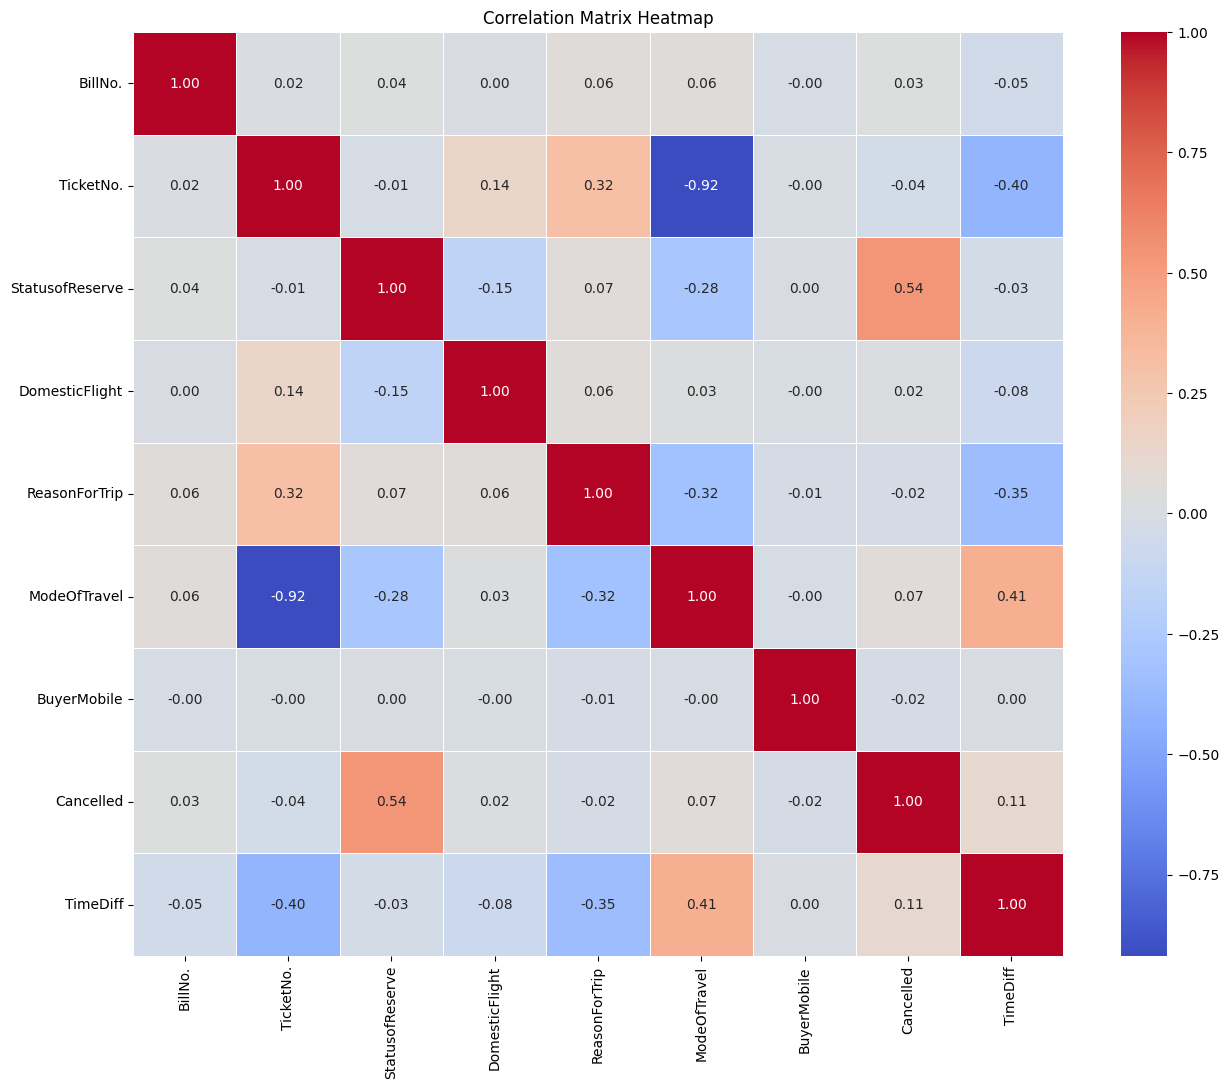

<class 'pandas.core.frame.DataFrame'>
Index: 70710 entries, 0 to 70710
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BillNo.          70710 non-null  int64  
 1   TicketNo.        70710 non-null  float64
 2   StatusofReserve  70710 non-null  int64  
 3   DomesticFlight   70710 non-null  int64  
 4   ReasonForTrip    70710 non-null  int64  
 5   ModeOfTravel     70710 non-null  int64  
 6   BuyerMobile      70710 non-null  int64  
 7   Cancelled        70710 non-null  int64  
 8   TimeDiff         70710 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 5.4 MB
None


In [70]:
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix Heatmap")
plt.show()
print(df.info())

### Spliting Train df and training our model

In [71]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier



# Separate the target variable and features
y = df['Cancelled']
X = df.drop('Cancelled', axis=1)

# Initialize SimpleImputer with a strategy (fill missing values with the mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your data (X) to fill missing values if left any
X_imputed = imputer.fit_transform(X)

# Convert the result back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.1575, random_state=42)
# test_size=0.1575 gives best f1 and n_estimators=150
# Initialize and train multiple models
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=150, random_state=42)),
    ("XGBoost", XGBClassifier(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("LightGBM", LGBMClassifier(n_estimators=100, random_state=42)),

]
    

best_model = None
best_f1 = 0
### Iterate over all the models and select the best one
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"F1-Score: {f1}")
    print(f"Accuracy: {accuracy}")
    print("--------")

    if f1 > best_f1:
        best_f1 = f1
        best_model = model_name

print(f"The best model is: {best_model} with an F1-Score of {best_f1}")

# Assign the best model to the 'model' variable
model = None
for model_name, model_instance in models:
    if model_name == best_model:
        model = model_instance


Model: Random Forest
F1-Score: 0.9571037420139945
Accuracy: 0.9873394989674059
--------
Model: XGBoost
F1-Score: 0.939938080495356
Accuracy: 0.98258058723175
--------
Model: Gradient Boosting
F1-Score: 0.9340830990315526
Accuracy: 0.9810541438448415
--------
Model: LightGBM
F1-Score: 0.9359054138145613
Accuracy: 0.9815030977821676
--------
The best model is: Random Forest with an F1-Score of 0.9571037420139945


### Applying same preprocessing to the Test Data

In [72]:
test_df = pd.read_csv("/kaggle/input/cancellation/test.csv", encoding="utf-8")

columns_to_encode = ['ReasonForTrip', 'ModeOfTravel']

for column in columns_to_encode:
    test_df[column] = label_encoder.fit_transform(test_df[column])
columns_to_drop = [  "CityTo", "CityFrom", "VehicleClass", "PassportNumberHashed", "EmailHashed", "UserID", "TypeOfVehicle","Discounts","NationalCode","Gender-Male","Price"]
test_df.drop(columns_to_drop, axis=1, inplace=True)

test_df = calculate_days_difference(test_df)


In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 70710 entries, 0 to 70710
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BillNo.          70710 non-null  int64  
 1   TicketNo.        70710 non-null  float64
 2   StatusofReserve  70710 non-null  int64  
 3   DomesticFlight   70710 non-null  int64  
 4   ReasonForTrip    70710 non-null  int64  
 5   ModeOfTravel     70710 non-null  int64  
 6   BuyerMobile      70710 non-null  int64  
 7   Cancelled        70710 non-null  int64  
 8   TimeDiff         70710 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 5.4 MB


### Saving the output file prediciting on the test data

In [74]:
id_column = test_df['ID']
# Drop the 'ID' column from test_data_encoded
test_df = test_df.drop('ID', axis=1)
test_predictions = model.predict(test_df)


# Combine 'ID' column and predictions
submission = pd.DataFrame({'ID': id_column, 'Cancelled':  test_predictions})
submission.to_csv("rskc.csv", index=False)